# Week 3: Dimensionality Reduction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GLI-Lab/jupyterlite/blob/main/content/data_science/2024-fall/W3_Dimensionality_Reduction.ipynb)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

## Filter Methods

### R^2 and Adjusted R^2

In [ ]:
import pandas as pd

file_path = 'BostonHousing.csv'
data = pd.read_csv(file_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

X = data.drop(columns=['MEDV', 'CAT. MEDV'])
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_pred_all = model_all.predict(X_test)
r2_all = r2_score(y_test, y_pred_all)

n_all = X_test.shape[0]
p_all = X_test.shape[1]
adjusted_r2_all = adjusted_r2(r2_all, n_all, p_all)
r2_all, adjusted_r2_all

(0.6893967884614753, 0.6475177037596518)

### Correlation-based Filtering

In [ ]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop(index=['MEDV', 'CAT. MEDV'])
correlation_with_target

,MEDV
RM,0.695360
ZN,0.360445
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321
TAX,-0.468536
INDUS,-0.483725


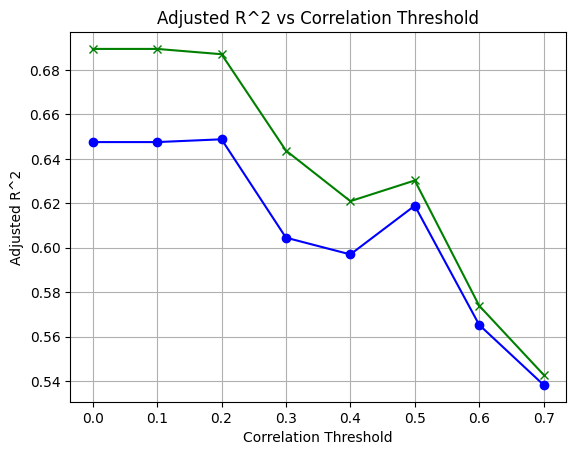

In [ ]:
thresholds = np.arange(0, 1.1, 0.1)
r2_values = []
adjusted_r2_values = []

for threshold in thresholds:
    selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()

    if len(selected_features) == 0:
        continue

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = LinearRegression()
    model_sel.fit(X_train_sel, y_train)

    y_pred_sel = model_sel.predict(X_test_sel)
    r2_sel = r2_score(y_test, y_pred_sel)

    n_sel = X_test_sel.shape[0]
    p_sel = X_test_sel.shape[1]
    adjusted_r2_sel = adjusted_r2(r2_sel, n_sel, p_sel)

    r2_values.append(r2_sel)
    adjusted_r2_values.append(adjusted_r2_sel)

plt.plot(thresholds[:len(adjusted_r2_values)], adjusted_r2_values, marker='o', label='Adjusted R^2', color='blue')
plt.plot(thresholds[:len(r2_values)], r2_values, marker='x', label='R^2', color='green')
plt.xlabel('Correlation Threshold')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs Correlation Threshold')
plt.grid(True)
plt.show()

### Mutual Information-based Filtering

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y)

mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

mutual_info_df

,Feature,Mutual Information
11,LSTAT,0.670998
5,RM,0.529189
2,INDUS,0.463478
4,NOX,0.462815
10,PTRATIO,0.441439
9,TAX,0.364019
0,CRIM,0.343149
6,AGE,0.309351
7,DIS,0.297084
8,RAD,0.208615


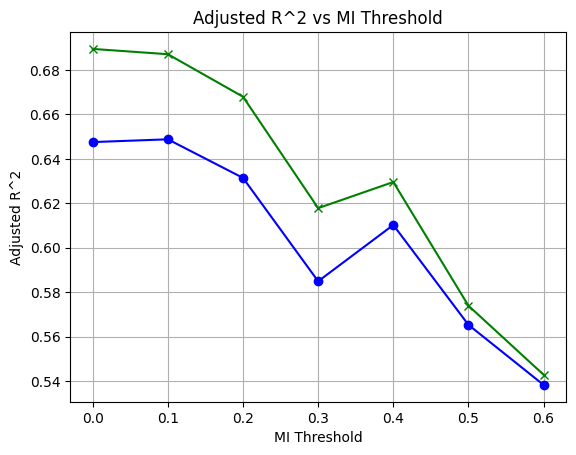

In [ ]:
thresholds = np.arange(0, 1.1, 0.1)
r2_values_mutual_info = []
adjusted_r2_values_mutual_info = []

for threshold in thresholds:
    selected_features = mutual_info_df[mutual_info_df['Mutual Information'] > threshold]['Feature'].tolist()

    if len(selected_features) == 0:
        continue

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = LinearRegression()
    model_sel.fit(X_train_sel, y_train)

    y_pred_sel = model_sel.predict(X_test_sel)
    r2_sel = r2_score(y_test, y_pred_sel)

    n_sel = X_test_sel.shape[0]
    p_sel = X_test_sel.shape[1]
    adjusted_r2_sel = adjusted_r2(r2_sel, n_sel, p_sel)

    r2_values_mutual_info.append(r2_sel)
    adjusted_r2_values_mutual_info.append(adjusted_r2_sel)

plt.plot(thresholds[:len(adjusted_r2_values_mutual_info)], adjusted_r2_values_mutual_info, marker='o', label='Adjusted R^2', color='blue')
plt.plot(thresholds[:len(r2_values_mutual_info)], r2_values_mutual_info, marker='x', label='R^2', color='green')
plt.xlabel('MI Threshold')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs MI Threshold')
plt.grid(True)
plt.show()

### Chi-Test-based Filtering

In [ ]:
|from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None)
scaler = MinMaxScaler()

X_binned = kbins.fit_transform(X)
X_binned_scaled = scaler.fit_transform(X_binned)
y_binned = kbins.fit_transform(y.values.reshape(-1, 1))

chi2_scores, p_values = chi2(X_binned_scaled, y_binned)

chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-square Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi-square Score', ascending=False)
chi2_df

,Feature,Chi-square Score,p-value
8,RAD,86.994570,5.724041e-18
11,LSTAT,66.302783,1.367547e-13
9,TAX,62.196423,1.001611e-12
1,ZN,46.236305,2.199166e-09
2,INDUS,43.467677,8.275354e-09
4,NOX,40.103688,4.119884e-08
0,CRIM,35.804434,3.174524e-07
6,AGE,20.428870,4.108702e-04
7,DIS,19.989902,5.016966e-04
10,PTRATIO,18.667031,9.135951e-04


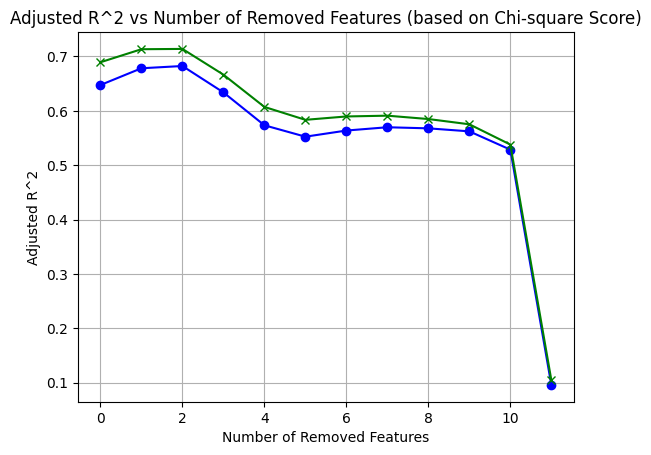

In [ ]:
features_sorted_by_chi2 = chi2_df.sort_values(by='Chi-square Score')['Feature'].tolist()
r2_values_mutual_chi2_removal = []
adjusted_r2_values_chi2_removal = []

for i in range(len(features_sorted_by_chi2)):
    selected_features = features_sorted_by_chi2[i:]

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = LinearRegression()
    model_sel.fit(X_train_sel, y_train)

    y_pred_sel = model_sel.predict(X_test_sel)
    r2_sel = r2_score(y_test, y_pred_sel)

    n_sel = X_test_sel.shape[0]
    p_sel = X_test_sel.shape[1]
    adjusted_r2_sel = adjusted_r2(r2_sel, n_sel, p_sel)

    r2_values_mutual_chi2_removal.append(r2_sel)
    adjusted_r2_values_chi2_removal.append(adjusted_r2_sel)

plt.plot(range(len(features_sorted_by_chi2)), adjusted_r2_values_chi2_removal, marker='o', label='Adjusted R^2', color='blue')
plt.plot(range(len(features_sorted_by_chi2)), r2_values_mutual_chi2_removal, marker='x', label='R^2', color='green')
plt.xlabel('Number of Removed Features')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 vs Number of Removed Features (based on Chi-square Score)')
plt.grid(True)
plt.show()

In [ ]:
max_adjusted_r2_chi2 = max(adjusted_r2_values_chi2_removal)
max_adjusted_r2_mutual_info = max(adjusted_r2_values_mutual_info)
max_adjusted_r2_correlation = max(adjusted_r2_values)

best_index_chi2 = adjusted_r2_values_chi2_removal.index(max_adjusted_r2_chi2)
removed_features_chi2 = features_sorted_by_chi2[:best_index_chi2]

best_index_mutual_info = adjusted_r2_values_mutual_info.index(max_adjusted_r2_mutual_info)
threshold_mutual_info = thresholds[best_index_mutual_info]
removed_features_mutual_info = mutual_info_df[mutual_info_df['Mutual Information'] <= threshold_mutual_info]['Feature'].tolist()

best_index_correlation = adjusted_r2_values.index(max_adjusted_r2_correlation)
threshold_correlation = thresholds[best_index_correlation]
removed_features_correlation = correlation_with_target[correlation_with_target.abs() <= threshold_correlation].index.tolist()

best_results = {
    "Method": ["Chi-square", "Mutual Information", "Correlation"],
    "Max Adjusted R^2": [max_adjusted_r2_chi2, max_adjusted_r2_mutual_info, max_adjusted_r2_correlation],
    "Removed Features": [removed_features_chi2, removed_features_mutual_info, removed_features_correlation]
}
best_results_df = pd.DataFrame(best_results)
best_results_df

,Method,Max Adjusted R^2,Removed Features
0,Chi-square,0.682490,"[RM, CHAS]"
1,Mutual Information,0.648764,[CHAS]
2,Correlation,0.648764,[CHAS]


## ...

In [ ]:
import numpy as np

y = np.array([3, 2, 4, 5, 6])                # Actual values
y_hat = np.array([2.8, 2.1, 3.9, 4.9, 5.9])  # predicted values

SST = np.sum((y - np.mean(y)) ** 2)  # Total Sum of Squares (SST)
SSR = np.sum((y - y_hat) ** 2)       # Residual Sum of Squares (SSR)

R_squared = 1 - (SSR / SST)
R_squared  # 0.992

0.992

In [ ]:
R_squared = 0.85  # R2 value
n = 100           # Number of data points
p = 5             # Number of predictors

Adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))
Adjusted_R_squared  # 0.842

0.8420212765957447

In [ ]:
# 데이터 생성
np.random.seed(0)
data = np.random.normal(size=100)

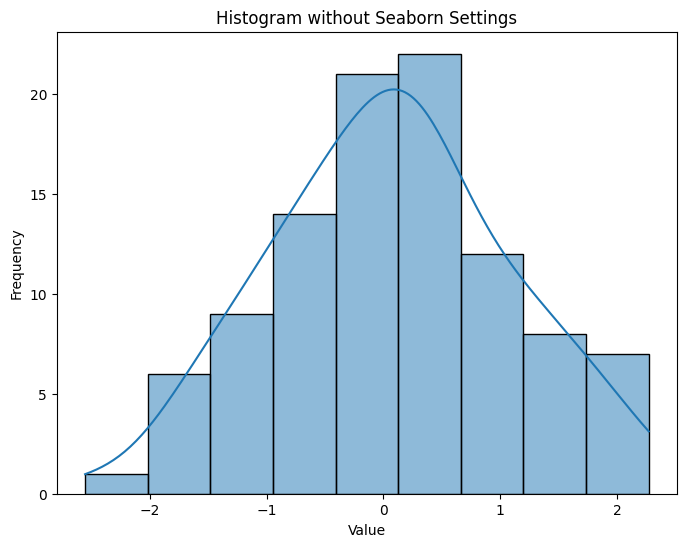

In [ ]:
# sns.set()  # Seaborn 기본 스타일 적용
# sns.reset_defaults()  # 기본 Matplotlib 스타일로 그려보기

plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True)
plt.title('Histogram without Seaborn Settings')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()